# 분석 주제 : 여행 상품 신청 여부 예측

# 0 데이터분석에 사용할 라이브러리 로드 

In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리 로드 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## cf) 폰트 설정

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 1 데이터 셋 로드 

In [4]:
import glob
path = glob.glob('data/*.csv')
path

['data\\sample_submission.csv',
 'data\\test.csv',
 'data\\test_v1.csv',
 'data\\train.csv',
 'data\\train_v1.csv']

In [5]:
train = pd.read_csv(path[3])
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [6]:
test = pd.read_csv(path[1])
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0


## 1.1 컬럼 의미 정의

# 2 데이터 셋 정보 확인

In [7]:
train.shape

(1955, 20)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

## 2.1 수치형 변수의 통계값 확인

In [9]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


## 2.2 전체 피쳐의 분포 확인

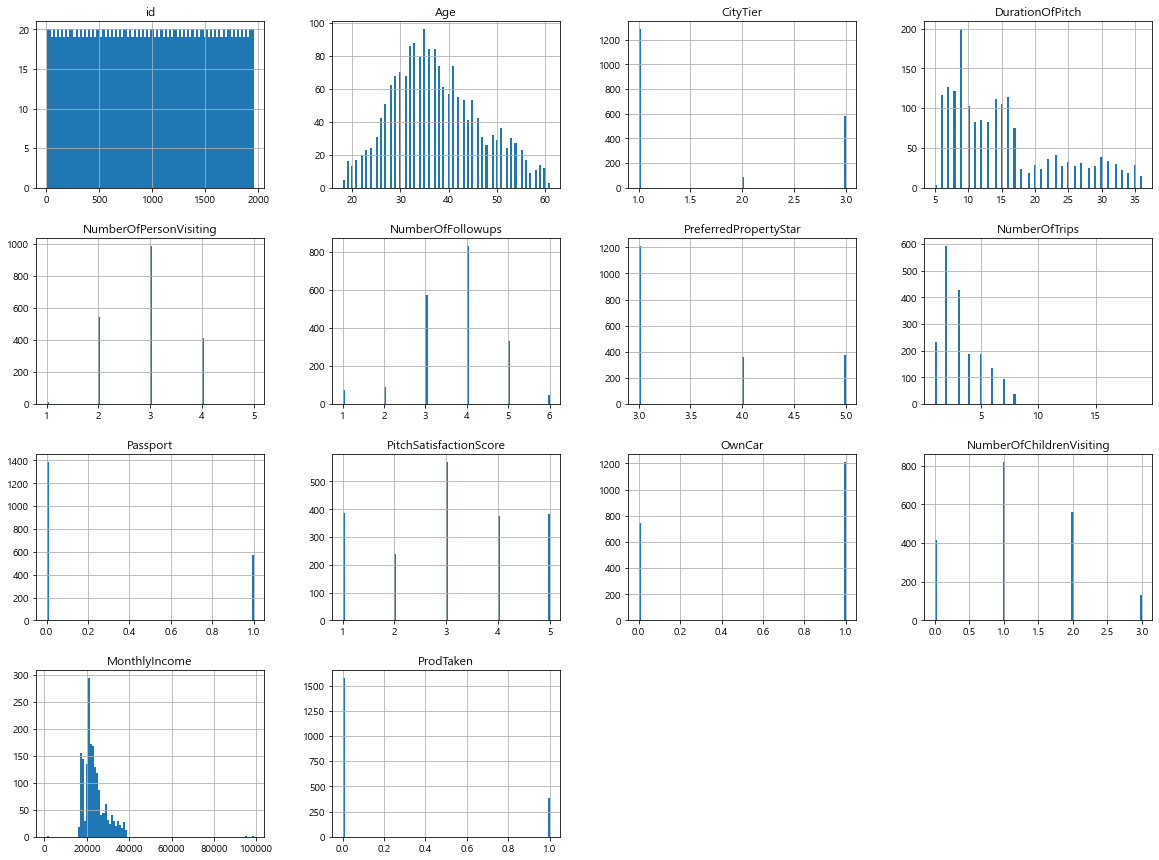

In [10]:
_ = train.hist(figsize=(20, 15), bins=100)

## 2.3 결측치 확인 및 시각화 

In [11]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

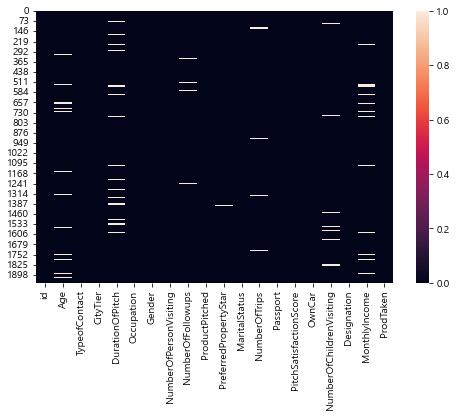

In [12]:
plt.figure(figsize = (8, 5))
sns.heatmap(train.isnull())
plt.show()

# 3 수치형 변수 전처리

## 3.1 train['NumberOfTrips']

In [13]:
#여행을 가보지 않은게 아니고 누락된 것 
# mean = 3.255532 / std = 1.814698	/ median = 3.000000
# 그래프 분포 : positive skew
# 중앙값(median)으로 결측치 채워주기 
train['NumberOfTrips'].unique()

array([ 3.,  1.,  2.,  7.,  4.,  6.,  5.,  8., nan, 19.])

count    1898.000000
mean        3.255532
std         1.814698
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: NumberOfTrips, dtype: float64

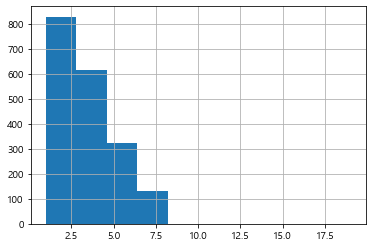

In [14]:
train['NumberOfTrips'].hist()
train['NumberOfTrips'].describe()

In [15]:
train['NumberOfTrips'].fillna(train['NumberOfTrips'].median(), inplace = True)

In [16]:
test['NumberOfTrips'].fillna(test['NumberOfTrips'].median(), inplace = True)

## 3.2 train['NumberOfChildrenVisiting']

In [17]:
#아이를 데리고 오지 않은것이 아니고 누락된 것 
# mean = 1.213174 / std = 0.859450	/ median = 1.000000
# 평균과 중간값 거의 일치하면 평균값으로 결측치 채워주기 
train['NumberOfChildrenVisiting'].unique()

array([ 1.,  0.,  2.,  3., nan])

count    1928.000000
mean        1.213174
std         0.859450
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: NumberOfChildrenVisiting, dtype: float64

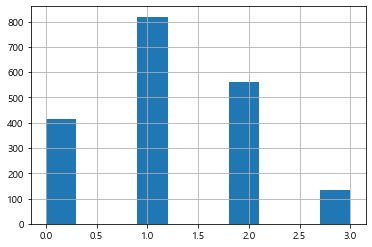

In [18]:
train['NumberOfChildrenVisiting'].hist()
train['NumberOfChildrenVisiting'].describe()

In [19]:
train['NumberOfChildrenVisiting'].fillna(train['NumberOfChildrenVisiting'].mean(), inplace = True)

In [20]:
test['NumberOfChildrenVisiting'].fillna(test['NumberOfChildrenVisiting'].mean(), inplace = True)

## 3.3 train['MonthlyIncome']

In [21]:
#소득은 누락이 없음 
# mean = 23636.311758 / std = 5617.457849	/ median = 22301.000000
# 소득은 무조건 중앙값(median)으로 결측치 채워주기 
train['MonthlyIncome'].unique()

array([20384., 19599.,    nan, ..., 31595., 22218., 17853.])

In [22]:
train['MonthlyIncome'].nunique()

1480

count     1855.000000
mean     23624.108895
std       5640.482258
min       1000.000000
25%      20390.000000
50%      22295.000000
75%      25558.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

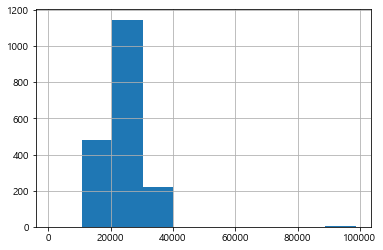

In [23]:
train['MonthlyIncome'].hist()
train['MonthlyIncome'].describe()

<AxesSubplot:>

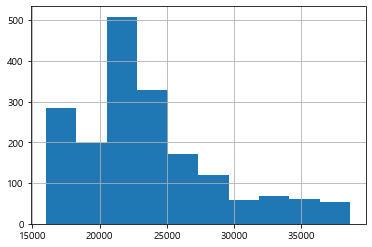

In [24]:
# 1000인 row 1개랑 90000이상 2개 row 이상치 같은데 제거할까? 
train[(train['MonthlyIncome'] <40000) &  (train['MonthlyIncome'] > 1000)]['MonthlyIncome'].hist()

In [25]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace = True)

In [26]:
test['MonthlyIncome'].fillna(test['MonthlyIncome'].median(), inplace = True)

## 3.4 train['Age']

In [27]:
#나이도 누락이 있음
# mean = 37.526432	 / median = 36.000000
# 평균 중앙값 거의 일치 -> 정규분포를 따름 -> 결측치 평균으로 채워줌 
train['Age'].unique()

array([28., 34., 45., 29., 42., 32., 43., 36., 35., 31., 49., nan, 52.,
       33., 22., 50., 23., 41., 37., 40., 56., 54., 39., 20., 46., 27.,
       38., 25., 26., 24., 30., 21., 51., 47., 55., 44., 53., 48., 18.,
       57., 60., 59., 19., 58., 61.])

count    1861.000000
mean       37.462117
std         9.189948
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

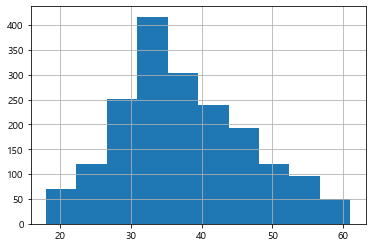

In [28]:
train['Age'].hist()
train['Age'].describe()

In [29]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [30]:
test['Age'].fillna(test['Age'].mean(), inplace = True)

## 3.5 train['PreferredPropertyStar']

In [31]:
#호텔 등급 선호도도 누락이 있음
# mean = 3.566161	 / median = 3.000000
# 평균 중앙값 거의 일치 -> 정규분포를 따름 -> 결측치 평균으로 채워줌 
train['PreferredPropertyStar'].unique()

array([ 3.,  4.,  5., nan])

count    1945.000000
mean        3.568638
std         0.793196
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: PreferredPropertyStar, dtype: float64

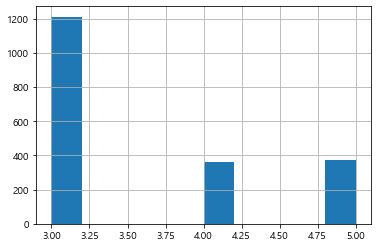

In [32]:
train['PreferredPropertyStar'].hist()
train['PreferredPropertyStar'].describe()

In [33]:
train['PreferredPropertyStar'].fillna(train['PreferredPropertyStar'].mean(), inplace = True)

In [34]:
test['PreferredPropertyStar'].fillna(test['PreferredPropertyStar'].mean(), inplace = True)

## 3.6 train['DurationOfPitch']

In [35]:
#영업 사원이 고객에게 제공하는 프레젠테이션 기간도 누락이 있음
# mean =  15.524015 / median = 14.000000	
# 그래프 분포 : positive skew
# 중앙값(median)으로 결측치 채워주기 
train['DurationOfPitch'].unique()

array([10., nan,  7.,  6., 29.,  8., 20., 14.,  9., 16., 15., 23., 21.,
       11., 25., 34., 17., 13., 28., 12., 22., 30., 24., 27., 31., 35.,
       32., 33., 36., 19., 26., 18.,  5.])

count    1853.000000
mean       15.524015
std         8.150057
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        36.000000
Name: DurationOfPitch, dtype: float64

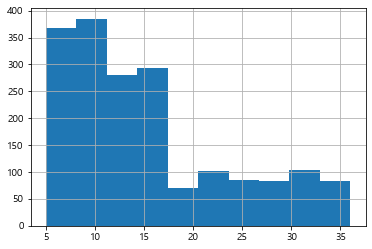

In [36]:
train['DurationOfPitch'].hist()
train['DurationOfPitch'].describe()

In [37]:
train['DurationOfPitch'].fillna(train['DurationOfPitch'].median(), inplace = True)

In [38]:
test['DurationOfPitch'].fillna(test['DurationOfPitch'].median(), inplace = True)

## 3.7 train['NumberOfFollowups']

In [39]:
#영업 사원의 프레젠테이션 후 이루어진 후속 조치 수도 누락이 있음
# mean =  15.524015 / median = 14.000000	
# 평균 중앙값 거의 일치 -> 정규분포를 따름 -> 결측치 평균으로 채워줌 
train['NumberOfFollowups'].unique()

array([ 4.,  3.,  5.,  1.,  6.,  2., nan])

count    1942.000000
mean        3.718332
std         1.004095
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfFollowups, dtype: float64

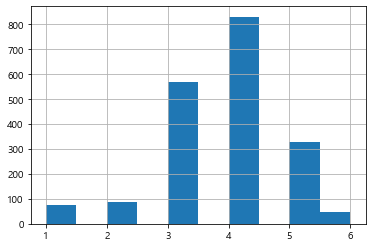

In [40]:
train['NumberOfFollowups'].hist()
train['NumberOfFollowups'].describe()

In [41]:
train['NumberOfFollowups'].fillna(train['NumberOfFollowups'].mean(), inplace = True)

In [42]:
test['NumberOfFollowups'].fillna(test['NumberOfFollowups'].mean(), inplace = True)

In [43]:
train['TypeofContact'].fillna('Unknown', inplace = True)

In [44]:
test['TypeofContact'].fillna('Unknown', inplace = True)

# 4 문자형 변수 전처리 

In [45]:
# Dtypes = 'object' 인것만 갖고오기 
cols = train.columns[train.dtypes == 'object']
cols

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [46]:
train[cols]

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


## 4.1 문자형 변수를 레이블 인코딩 해주기 

In [47]:
#문자형 변수들을 레이블 인코딩 변환을 진행해주자 
# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['TypeofContact']) #학습
le.transform(train['TypeofContact']) # 학습한 encoder를 사용하여 문자형 변수를 숫자로 변경해줌 

array([0, 1, 0, ..., 0, 1, 0])

### 4.1.1 train data encoding

In [48]:
x_tn = train.copy()

# for 문을 활용하여 문자형 변수들을 한번에 encoding 해주자 
for col in cols:
    le = LabelEncoder() #모델생성
    le.fit(x_tn[col])
    x_tn[col]= le.transform(x_tn[col]) #test 데이터는 학습시키면 안됨. 변환만 해줘야함 ㅠ 

In [49]:
#라벨 인코딩 잘 되었는지 확인
x_tn

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,14.0,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,14.0,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,22295.0,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


### 4.1.2 test data encoding

In [50]:
print(le.classes_)

['AVP' 'Executive' 'Manager' 'Senior Manager' 'VP']


In [51]:
# for 문을 활용하여 문자형 변수들을 한번에 encoding 해주자 
for col in cols:
    le = LabelEncoder() #모델생성
    le.fit(train[col])
    test[col]= le.transform(test[col]) #test 데이터는 학습시키면 안됨. 변환만 해줘야함 ㅠ 

In [53]:
# 마찬가지로 라벨인코딩 잘 되었는지 확인 
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,13.0,3,2,2,5.000000,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,3.701827,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.000000,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.000000,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.000000,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.000000,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.000000,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.000000,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.000000,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


## 라벨 인코딩 한거 다시 데이터로 저장 

In [60]:
x_tn.to_csv('data/train_v1.csv', index = False)

In [61]:
test.to_csv('data/test_v1.csv', index = False)

In [62]:
pd.read_csv('data/train_v1.csv', encoding = 'utf-8')

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,14.0,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,14.0,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,22295.0,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [63]:
pd.read_csv('data/test_v1.csv', encoding = 'utf-8')

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,13.0,3,2,2,5.000000,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,3.701827,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.000000,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.000000,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.000000,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.000000,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.000000,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.000000,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.000000,0,5.0,3,2.0,0,2,1,3.0,1,22102.0
